# description place here

In [112]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.options.mode.chained_assignment = None

pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns", 1000)

## Loading data
First of all, we need to read the test and train data into pandas dataframes we are going to work with

In [85]:
data_test = pd.read_csv("test.csv")
data_train = pd.read_csv("train.csv")

Observing amount of rows (features) and columns (records)

In [86]:
print("Test shape:", data_test.shape)
print("Train shape:", data_train.shape)

Test shape: (1459, 80)
Train shape: (1460, 81)


# Extracting categorical (object) and numerical data
For convinient EDA let's extract categorical and numerical features in a separate dataframes\
We'll drop target column `SalePrice` and uninformative column `Id`

In [84]:
TARGET_COLUMN = "SalePrice"

In [113]:
numerical_df = [x for x in data_train.columns if data_train.dtypes[x] != 'object']
numerical_df.remove("SalePrice")
numerical_df.remove("Id")
categorical_df = [x for x in data_train.columns if data_train.dtypes[x] == 'object']

# Observing samples
Let's take a few samples of train data

In [87]:
data_train.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
957,958,20,RL,70.0,7420,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1962,1962,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,417,Unf,0,640,1057,GasA,TA,Y,SBrkr,1057,0,0,1057,0,0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1977.0,Fin,2,576,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2007,WD,Normal,132000
1347,1348,20,RL,93.0,15306,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,Stone,100.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,80,Unf,0,1652,1732,GasA,Ex,Y,SBrkr,1776,0,0,1776,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,Fin,3,712,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,New,Partial,283463
190,191,70,RL,70.0,10570,Pave,NaN,Reg,Bnk,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,2Story,8,8,1932,1994,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,Gd,Gd,No,Rec,297,Unf,0,556,853,GasA,TA,Y,SBrkr,1549,1178,0,2727,0,0,2,1,3,1,Gd,10,Maj1,2,TA,Detchd,1932.0,Unf,2,440,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,12,2007,WD,Normal,315000
848,849,50,RL,75.0,45600,Pave,NaN,IR2,Bnk,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1.5Fin,6,8,1908,1997,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,907,907,GasA,TA,Y,SBrkr,1307,1051,0,2358,0,0,3,0,5,1,TA,10,Typ,1,Gd,Detchd,1908.0,Unf,2,360,Fa,TA,Y,486,40,0,0,175,0,NaN,NaN,NaN,0,9,2008,WD,Normal,240000
977,978,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106,Unf,0,135,1241,GasA,Ex,Y,SBrkr,1241,0,0,1241,1,0,1,1,1,1,Gd,4,Typ,0,NaN,Attchd,2007.0,Fin,2,569,TA,TA,Y,0,116,0,0,0,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900
1088,1089,160,RM,24.0,2522,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Twnhs,2Story,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,Stone,50.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,970,970,GasA,Ex,Y,SBrkr,970,739,0,1709,0,0,2,0,3,1,Gd,7,Maj1,0,NaN,Detchd,2004.0,Unf,2,380,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal,137500
468,469,20,RL,98.0,11428,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,Stone,248.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1626,1626,GasA,Ex,Y,SBrkr,1634,0,0,1634,0,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,3,866,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,250000
528,529,30,RL,58.0,9098,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,7,1920,2002,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,Mn,ALQ,348,Unf,0,180,528,GasA,Ex,Y,SBrkr,605,0,0,605,1,0,1,0,2,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,144,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal,86000
629,630,80,RL,82.0,9020,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Feedr,Norm,1Fam,SLvl,6,5,1964,1964,Gable,WdShngl,Plywood,Wd Sdng,BrkFace,259.0,TA,TA,CBlock,TA,TA,Gd,GLQ,624,Rec,336,288,1248,GasA,TA,Y,SBrkr,1350,0,0,1350,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1964.0,RFn,2,520,TA,TA,Y,176,0,0,0,0,0,NaN,GdPrv,NaN,0,6,2008,WD,Normal,168500
1037,1038,60,RL,NaN,9240,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,396.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,10

# Observing data types
Now, let's see types of features

In [88]:
data_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


# Observing uniques
How many variants of categorical features is there

In [96]:
data_train.select_dtypes("object").apply(pd.Series.nunique, axis=0)

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

In [97]:
data_test.select_dtypes("object").apply(pd.Series.nunique,axis=0)

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         1
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        5
BldgType          5
HouseStyle        7
RoofStyle         6
RoofMatl          4
Exterior1st      13
Exterior2nd      15
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           4
HeatingQC         5
CentralAir        2
Electrical        4
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        4
GarageCond        5
PavedDrive        3
PoolQC            2
Fence             4
MiscFeature       3
SaleType          9
SaleCondition     6
dtype: int64

# Both-side check for missing categorical values in test and train datasets
Let's also check in advance for difference in uniques so we can clear them lately

In [91]:
# flattens the list
def flatten(to_flatten):
    return [item for sublist in to_flatten for item in sublist]

# returns x - y
def list_diff(x,y):
    return [item for item in x if item not in y]

# returns list of categorical values that need to be
# removed from train and test to make them match
def unique_values_diff(train_df, test_df):
    uniques_train = train_df.select_dtypes("object").apply(pd.Series.nunique, axis=0)
    uniques_test = test_df.select_dtypes("object").apply(pd.Series.nunique, axis=0)
    
    difference = uniques_test - uniques_train
    
    need_to_be_cleared_in_test = list()
    need_to_be_cleared_in_train = list()
    
    
    for index, value in difference.items():
        if value != 0:
            valunique_train = train_df[index].unique()
            valunique_test = test_df[index].unique()
            
            cur_not_in_train = list_diff(valunique_test, valunique_train)
            cur_not_in_test = list_diff(valunique_train, valunique_test)
            
            print(f"Difference on [{index}]:" 
                  + f"\n\tMissing in train: {cur_not_in_train}\n\tMissing in test: {cur_not_in_test}")
            
            need_to_be_cleared_in_test.append(cur_not_in_train)
            need_to_be_cleared_in_train.append(cur_not_in_test)
    
    
    
    return (flatten(need_to_be_cleared_in_train), flatten(need_to_be_cleared_in_test))


remove_train, remove_test = unique_values_diff(data_train, data_test)

Difference on [Utilities]:
	Missing in train: [nan]
	Missing in test: ['NoSeWa']
Difference on [Condition2]:
	Missing in train: []
	Missing in test: ['RRNn', 'RRAn', 'RRAe']
Difference on [HouseStyle]:
	Missing in train: []
	Missing in test: ['2.5Fin']
Difference on [RoofMatl]:
	Missing in train: []
	Missing in test: ['Metal', 'Membran', 'Roll', 'ClyTile']
Difference on [Exterior1st]:
	Missing in train: [nan]
	Missing in test: ['Stone', 'ImStucc']
Difference on [Exterior2nd]:
	Missing in train: [nan]
	Missing in test: ['Other']
Difference on [Heating]:
	Missing in train: []
	Missing in test: ['OthW', 'Floor']
Difference on [Electrical]:
	Missing in train: []
	Missing in test: ['Mix', nan]
Difference on [GarageQual]:
	Missing in train: [nan]
	Missing in test: [nan, 'Ex']
Difference on [PoolQC]:
	Missing in train: [nan]
	Missing in test: [nan, 'Fa']
Difference on [MiscFeature]:
	Missing in train: [nan]
	Missing in test: [nan, 'TenC']


# Percentage of missing values
It's important to check how much values we missing in each column\
To handle missing values, we can impute the them with another values (according to distributions)\
Features that missing *huge percentage* of values will be simple deleted

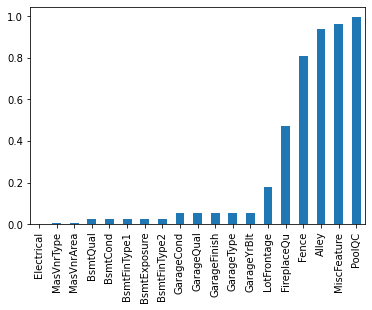

In [161]:
def missing_values_percentage(data):
    missing_data = data.isnull().sum()
    missing_data = missing_data[missing_data > 0]
    missing_data.sort_values(inplace=True)
    missing_data = pd.to_numeric(missing_data, downcast="float")
    rows = data.shape[0]
    
    for name, val in missing_data.items():
        percent = missing_data[name]/rows
        missing_data[name] = percent
        
    missing_data.plot.bar()

    
missing_values_percentage(data_train)

Ok, features `PoolQC`, `MiscFeature`, `Alley` and` Fence` won't take part in modeling :)

# Checking for duplicates
We also need to know whether we having duplicates in our data and decide should the duplicates stay in the training/testing set or not

In [110]:
def duplicates(data):
    return data[data.duplicated()]
    
duplicates(data_train)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [111]:
duplicates(data_test)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


Lucky for us we don't have duplicates :)

# Target overview
Let's see the distribution plot of our target variable - `SalePrice`

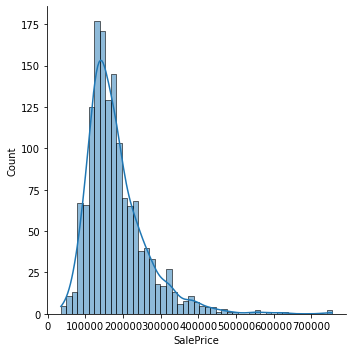

In [166]:
sns.displot(data_train[TARGET_COLUMN], kde=True)

# Correlations with target

Let's absolute correlations with the target variable
The more correlation coefficient we get the more the corresponding feature
will be influencing our model

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
Id               0.021917
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePr

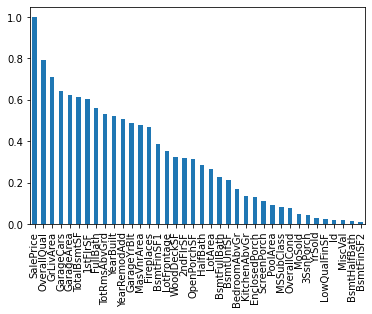

In [169]:
abs_cors = abs(data_train.corr()[TARGET_COLUMN]).sort_values(ascending=False)
abs_cors.plot.bar()
print(abs_cors)

### Relationship with some numerical variables

In [167]:
def pair_dist(df, target, other):
    data = pd.concat([df[target], df[other]], axis=1)
    data.plot.scatter(x=other, y=target, ylim=(0,1000000))

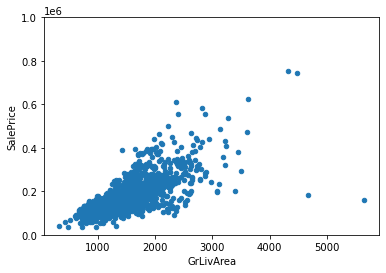

In [185]:
pair_dist(data_train, TARGET_COLUMN, "GrLivArea")

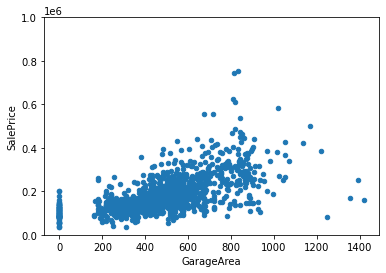

In [186]:
pair_dist(data_train, TARGET_COLUMN, "GarageArea")

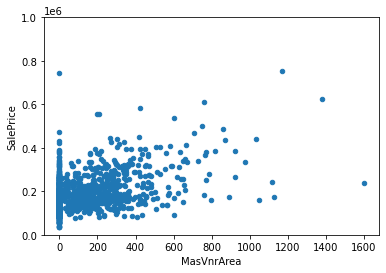

In [187]:
pair_dist(data_train, TARGET_COLUMN, "MasVnrArea")

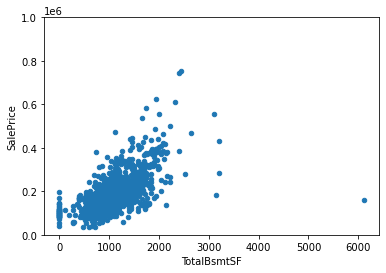

In [194]:
pair_dist(data_train, TARGET_COLUMN, "TotalBsmtSF")

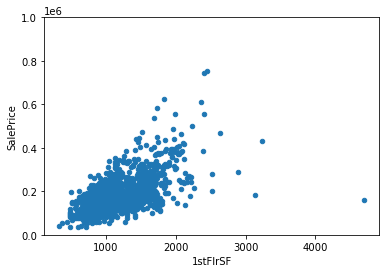

In [196]:
pair_dist(data_train, TARGET_COLUMN, "1stFlrSF")


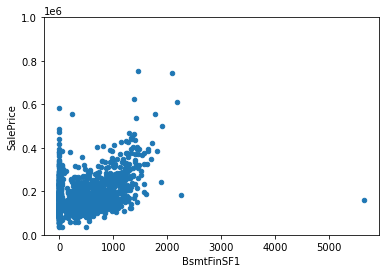

In [205]:
pair_dist(data_train, TARGET_COLUMN, "BsmtFinSF1")


We can see that some features are linearly related with `SalesPrice` like `TotalBsmtSF`, `GrLivArea` and `1stFlrSF` (positive relationship)

### Relation with some categorical values

In [189]:
def pair_box(df, target, other):
    data = pd.concat([df[target], df[other]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=other, y=target, data=data)
    fig.axis(ymin=0, ymax=800000)

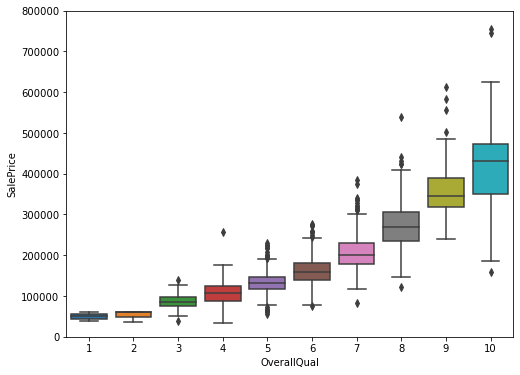

In [190]:
pair_box(data_train, TARGET_COLUMN, "OverallQual")

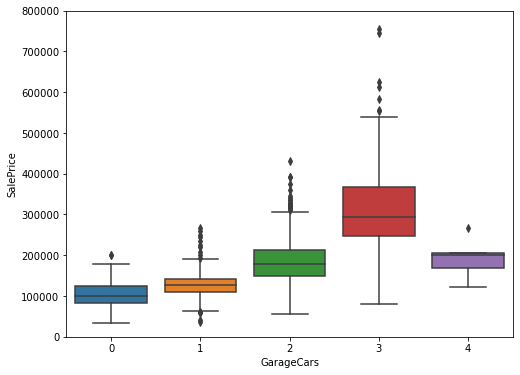

In [192]:
pair_box(data_train, TARGET_COLUMN, "GarageCars")

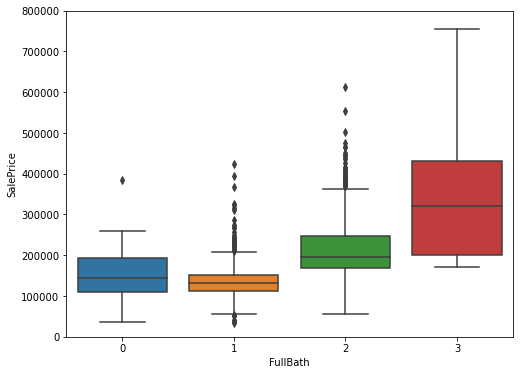

In [198]:
pair_box(data_train, TARGET_COLUMN, "FullBath")

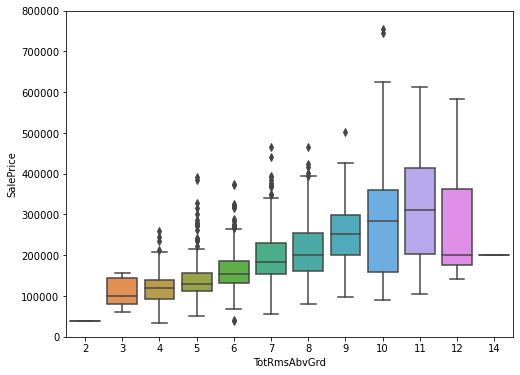

In [201]:
pair_box(data_train, TARGET_COLUMN, "TotRmsAbvGrd")

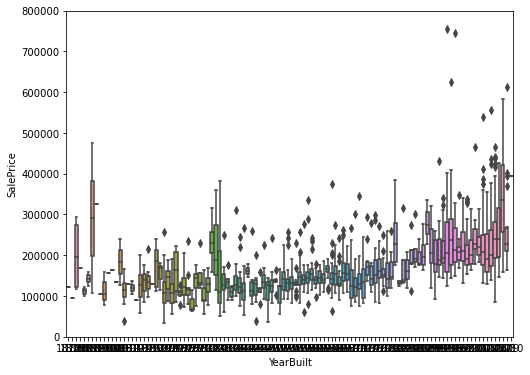

In [202]:
pair_box(data_train, TARGET_COLUMN, "YearBuilt")

In this case we see that `OverallQual` is also seem to be linearly related with target variable.  Also `SalePrice` has strong relation with `GarageCars`